<h1><div style="text-align: center"> Phish Detector </div></h1> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

from scipy.io import arff

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import tensorflow as tf

%matplotlib inline

In [2]:
data, meta = arff.loadarff("phishingdataset.arff")

In [3]:
# Data Preprocessing

data = pd.DataFrame(data)
data = data.astype(str)
r = {"b'1'": '1', "b'-1'": '-1', "b'0'": '0'}
data = data.replace(r)
data = data.astype(int)

In [4]:
data = data[['having_IP_Address','URL_Length','having_At_Symbol','Shortining_Service','double_slash_redirecting','Prefix_Suffix','having_Sub_Domain','HTTPS_token','URL_of_Anchor','age_of_domain','Page_Rank','Result']]

In [5]:
data

,having_IP_Address,URL_Length,having_At_Symbol,Shortining_Service,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token,URL_of_Anchor,age_of_domain,Page_Rank,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,-1,0,-1,-1,-1
2,1,0,1,1,1,-1,-1,-1,0,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,0,-1,-1,-1
4,1,0,1,-1,1,-1,1,1,0,-1,-1,1
5,-1,0,1,-1,-1,-1,1,-1,0,1,-1,1
6,1,0,1,-1,1,-1,-1,1,-1,1,-1,-1
7,1,0,1,1,1,-1,-1,-1,0,-1,-1,-1
8,1,0,1,-1,1,-1,1,-1,0,1,1,1
9,1,1,1,-1,1,-1,-1,1,0,1,-1,-1


In [6]:
X = data.iloc[:,:-1] # features
y = data.iloc[:,-1]  # class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train = (7406, 11), X_test = (3649, 11)

In [7]:
# from joblib import dump, load
# dump(clf, 'filename.joblib')
# clf = load('filename.joblib')

In [8]:
# Model Selection 1 (Basic classifiers)

# (1) Decision Trees

dt0 = tree.DecisionTreeClassifier()
dt0.fit(X_train, y_train)
print("Decision tree :", dt0.score(X_test, y_test))

dt1 = tree.DecisionTreeClassifier(min_samples_leaf=4)
dt1.fit(X_train, y_train)
print("Decision tree, min_samples_leaf = 4 :", dt1.score(X_test, y_test))

dt2 = tree.DecisionTreeClassifier(min_samples_leaf=6)
dt2.fit(X_train, y_train)
print("Decision tree, min_samples_leaf = 6 :", dt2.score(X_test, y_test))
print()


# (2) KNN

knn0 = KNeighborsClassifier(n_neighbors = 18)
knn0.fit(X_train, y_train)
print("KNN, K=18 :", knn0.score(X_test, y_test))

knn1 = KNeighborsClassifier(n_neighbors = 25)
knn1.fit(X_train, y_train)
print("KNN, K=25 :", knn1.score(X_test, y_test))
print()


# (3) MLP

mlp0 = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp0.fit(X_train, y_train)
print("MLP, (15, 15) :", mlp0.score(X_test, y_test))

mlp1 = MLPClassifier(hidden_layer_sizes=(15, 15, 15))
mlp1.fit(X_train, y_train)
print("MLP, (15, 15, 15) :", mlp1.score(X_test, y_test))

mlp2 = MLPClassifier(hidden_layer_sizes=(20, 20))
mlp2.fit(X_train, y_train)
print("MLP, (20, 20) :", mlp2.score(X_test, y_test))

mlp3 = MLPClassifier(hidden_layer_sizes=(30, 30))
mlp3.fit(X_train, y_train)
print("MLP, (30, 30) :", mlp3.score(X_test, y_test))
print()


# (4) SVM
svc0 = SVC()
svc0.fit(X_train, y_train)
print("SVM :", svc0.score(X_test, y_test))
print()


# (5) Neural Network
onehoty_train = pd.get_dummies(y_train, prefix='Result', columns=['Result'])
onehoty_test = pd.get_dummies(y_test, prefix='Result', columns=['Result'])

n_nodes_input = 11 # number of input features
n_nodes_hl = 11     # number of units in a hidden layer
n_classes = 2       # classes
a = tf.placeholder('float', [None, 11])
b = tf.placeholder('float')

def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer['weights']), hidden_layer['biases'])
    l1 = tf.nn.sigmoid(l1)
    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(a):
    prediction = neural_network_model(a)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=b,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {a: X_train, b: onehoty_train})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print('Epoch', epoch, 'completed out of', 1000, 'Training loss:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(b,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {a: X_train, b: onehoty_train}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {a: X_test, b: onehoty_test}))
    
train_neural_network(a)

Decision tree : 0.8799671142778843
Decision tree, min_samples_leaf = 4 : 0.8755823513291313
Decision tree, min_samples_leaf = 6 : 0.8772266374349137

KNN, K=18 : 0.8646204439572486
KNN, K=25 : 0.8648944916415456

MLP, (15, 15) : 0.8857221156481228
MLP, (15, 15, 15) : 0.886818306385311
MLP, (20, 20) : 0.8832556864894492
MLP, (30, 30) : 0.8854480679638257

SVM : 0.8851740202795286

Epoch 100 completed out of 1000 Training loss: 0.6302474737167358
Epoch 200 completed out of 1000 Training loss: 0.5794747471809387
Epoch 300 completed out of 1000 Training loss: 0.5242525935173035
Epoch 400 completed out of 1000 Training loss: 0.47351130843162537
Epoch 500 completed out of 1000 Training loss: 0.4330567419528961
Epoch 600 completed out of 1000 Training loss: 0.40243563055992126
Epoch 700 completed out of 1000 Training loss: 0.3791404962539673
Epoch 800 completed out of 1000 Training loss: 0.36160334944725037
Epoch 900 completed out of 1000 Training loss: 0.3486199676990509
Train set Accuracy: 

In [9]:
rf_for_emb = RandomForestClassifier()      
rf_for_emb = rf_for_emb.fit(X, y)
importances = rf_for_emb.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_for_emb.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. URL_of_Anchor (0.671272)
2. having_Sub_Domain (0.101726)
3. Prefix_Suffix (0.077662)
4. URL_Length (0.028155)
5. Page_Rank (0.023511)
6. having_IP_Address (0.022885)
7. age_of_domain (0.019092)
8. Shortining_Service (0.018614)
9. having_At_Symbol (0.013625)
10. double_slash_redirecting (0.012476)
11. HTTPS_token (0.010984)


In [10]:
# Prediction examples using KNN
print(knn0.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))
print(knn0.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[1]
[-1]


In [11]:
# Model Selection 2 (Ensemble)

# (1) RandomForest

RFclf0 = RandomForestClassifier()
RFclf0.fit(X_train, y_train)
print("RandomForest :", RFclf0.score(X_test, y_test))

RFclf1 = RandomForestClassifier(n_estimators = 20)
RFclf1.fit(X_train, y_train)
print("RandomForest, n_estimators=20 :", RFclf1.score(X_test, y_test))
print()
      
    
# (2) Bagging
      
bag0 = BaggingClassifier()
bag0.fit(X_train, y_train)
print("Bagging :", bag0.score(X_test, y_test))
      
bag1 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3))
bag1.fit(X_train, y_train)
print("Bagging, base_estimator=KNN(k=3) :", bag1.score(X_test, y_test))
      
bag2 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=28))
bag2.fit(X_train, y_train)
print("Bagging, base_estimator=KNN(k=28) :", bag2.score(X_test, y_test))
print()
      
    
# (3) AdaBoost
      
ABclf0 = AdaBoostClassifier() #n_estimators=50, learning_rate = 1
ABclf0.fit(X_train, y_train)
print("AdaBoost :", ABclf0.score(X_test, y_test))
      
ABclf1 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5)
ABclf1.fit(X_train, y_train)
print("AdaBoost, n_estimators=200, learning_rate=0.5 :", ABclf1.score(X_test, y_test))
      
ABclf2 = AdaBoostClassifier(n_estimators=400, learning_rate = 0.5)
ABclf2.fit(X_train, y_train)
print("AdaBoost, n_estimators=400, learning_rate=0.5 :", ABclf2.score(X_test, y_test))
print()


# (4) Voting
voteclf1 = VotingClassifier(
    estimators=[('dt0', tree.DecisionTreeClassifier()), 
                ('mlp2', MLPClassifier(hidden_layer_sizes=(20, 20))),
                ('RFclf1', RandomForestClassifier(n_estimators = 20)),
                ('bag0', BaggingClassifier())], 
    voting='soft')
voteclf1.fit(X_train, y_train)
print("Voting, DT & MLP & RF & BAGGING :", voteclf1.score(X_test, y_test))

RandomForest : 0.8851740202795286
RandomForest, n_estimators=20 : 0.8859961633324198

Bagging : 0.8791449712249931
Bagging, base_estimator=KNN(k=3) : 0.8720197314332694
Bagging, base_estimator=KNN(k=28) : 0.8640723485886544

AdaBoost : 0.8553028226911482
AdaBoost, n_estimators=200, learning_rate=0.5 : 0.8555768703754453
AdaBoost, n_estimators=400, learning_rate=0.5 : 0.8547547273225541

Voting, DT & MLP & RF & BAGGING : 0.8816114003836668


C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


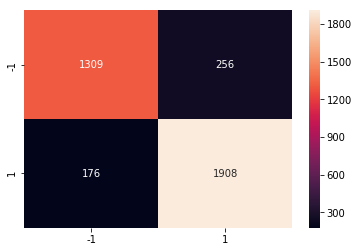

In [12]:
cm = confusion_matrix(y_test, voteclf1.predict(X_test), labels = [-1, 1])
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = [-1, 1], yticklabels = [-1, 1])

In [13]:
dump(voteclf1, 'filename.joblib')

['filename.joblib']